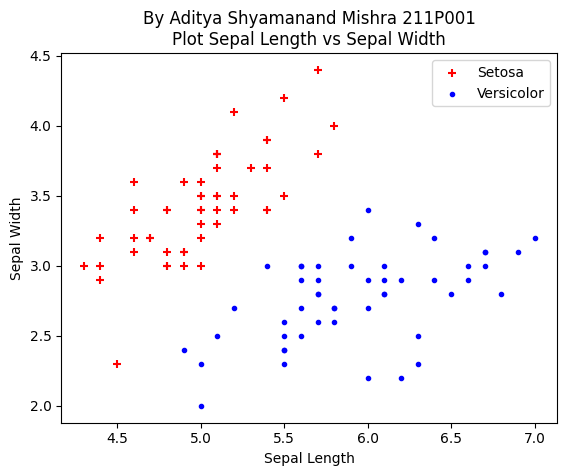

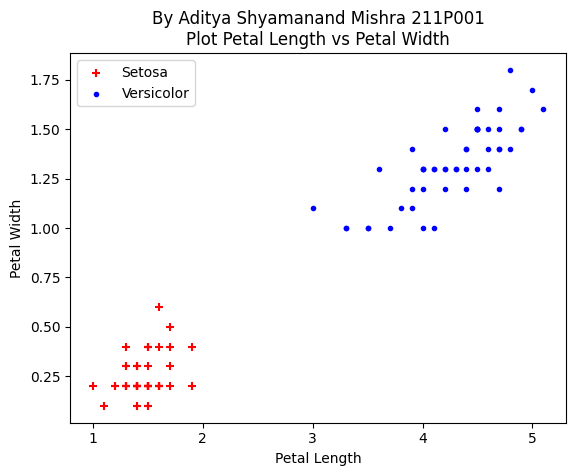

Prediction for input [4.8, 3.0, 1.5, 0.3]: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load Iris dataset and create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Split dataset by class
df0, df1, df2 = df[:50], df[50:100], df[100:]

# Plot Sepal and Petal dimensions for Setosa and Versicolor
def plot_dimensions(x, y, xlabel, ylabel, title):
    plt.title(f"By Aditya Shyamanand Mishra 211P001\n{title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(df0[x], df0[y], color="red", marker='+', label="Setosa")
    plt.scatter(df1[x], df1[y], color="blue", marker='.', label="Versicolor")
    plt.legend()
    plt.show()

plot_dimensions('sepal length (cm)', 'sepal width (cm)', 'Sepal Length', 'Sepal Width', "Plot Sepal Length vs Sepal Width")
plot_dimensions('petal length (cm)', 'petal width (cm)', 'Petal Length', 'Petal Width', "Plot Petal Length vs Petal Width")

# Prepare training and testing data
X = df.drop(['target', 'flower_name'], axis='columns')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train SVM models with different parameters
models = {
    'default': SVC(),
    'C=1': SVC(C=1),
    'C=10': SVC(C=10),
    'gamma=10': SVC(gamma=10),
    'linear': SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Example prediction
prediction = models['default'].predict([[4.8, 3.0, 1.5, 0.3]])
print(f"Prediction for input [4.8, 3.0, 1.5, 0.3]: {iris.target_names[prediction[0]]}")


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset and split into training/testing sets
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Create the GUI window
window = tk.Tk()
window.title("Iris Flower Classification by Aditya Shyamanand Mishra 211P001")
window.geometry("400x400")

# Create input fields for features
labels = ["Sepal Length:", "Sepal Width:", "Petal Length:", "Petal Width:"]
entries = [ttk.Entry(window) for _ in labels]
for i, (label_text, entry) in enumerate(zip(labels, entries)):
    ttk.Label(window, text=label_text).grid(row=i, column=0, padx=5, pady=5)
    entry.grid(row=i, column=1, padx=5, pady=5)

# Kernel selection dropdown and regularization slider
ttk.Label(window, text="Kernel:").grid(row=4, column=0, padx=5, pady=5)
kernel_var = tk.StringVar(value="rbf")
ttk.Combobox(window, textvariable=kernel_var, values=["linear", "poly", "rbf", "sigmoid"]).grid(row=4, column=1, padx=5, pady=5)

ttk.Label(window, text="Regularization (C):").grid(row=5, column=0, padx=5, pady=5)
c_var = tk.DoubleVar(value=1.0)
ttk.Scale(window, from_=0.1, to=10.0, variable=c_var, orient="horizontal").grid(row=5, column=1, padx=5, pady=5)

# Prediction function
def predict():
    try:
        input_values = [float(entry.get()) for entry in entries]
        model = SVC(kernel=kernel_var.get(), C=c_var.get())
        model.fit(X_train, y_train)
        prediction = model.predict([input_values])[0]
        result_label.config(text="Prediction: " + iris.target_names[prediction])
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")

# Predict and reset buttons
ttk.Button(window, text="Predict", command=predict).grid(row=6, column=0, columnspan=2, padx=5, pady=10)
result_label = ttk.Label(window, text="")
result_label.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")
    kernel_var.set("rbf")
    c_var.set(1.0)

ttk.Button(window, text="Reset", command=reset).grid(row=8, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Select fewer features correctly
X = df[['age', 'bmi', 'bp', 's5']]  # 'bp' is blood pressure and 's5' is a selected feature
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model once
model = LinearRegression()
model.fit(X_train, y_train)

# Create the GUI window
window = tk.Tk()
window.title("Diabetes Progression Prediction")
window.geometry("400x400")

# Create input fields for selected features
labels = {
    'age': "Age (years)",
    'bmi': "Body Mass Index (BMI)",
    'bp': "Blood Pressure (mm Hg)",
    's5': "S5 Measurement"
}

entries = []
for i, (key, label_text) in enumerate(labels.items()):
    label = ttk.Label(window, text=label_text + ":")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create a button to predict
def predict():
    try:
        # Get input values
        input_values = [float(entry.get()) for entry in entries]
        # Make prediction
        prediction = model.predict([input_values])[0]
        # Display prediction
        result_label.config(text="Disease Progression: {:.2f}".format(prediction))
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred: {str(e)}")

# Create a button to predict
predict_button = ttk.Button(window, text="Predict", command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the prediction
result_label = ttk.Label(window, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, padx=5, pady=5)

# Create a reset button to clear inputs
def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")

reset_button = ttk.Button(window, text="Reset", command=reset)
reset_button.grid(row=len(labels) + 2, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()
